In [5]:
from mesa import Agent, Model
from mesa.time import RandomActivation


In [6]:
class MoneyAgent(Agent):
    
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 15

    def step(self):
        if self.wealth == 0:
            return
        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.wealth += 1
        self.wealth -= 1
        agent_N = ["Investor   ","Consumer   ","Prosumer   ","Retailer   ","Distributor"]
     
        print ("Hi, I am " + agent_N[self.unique_id] + " and my wealth is " + str(self.wealth))

In [7]:
class MoneyModel(Model):
    
    """A model with some number of agents."""
   
    def __init__(self, N):
        self.num_agents = N
   
        
        self.schedule = RandomActivation(self)
        
        # Create agents  
        
        for i in range(self.num_agents):
            
            a = MoneyAgent(i, self)
            self.schedule.add(a)

    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()

In [8]:
empty_model = MoneyModel(1)
empty_model.step()

Hi, I am Investor    and my wealth is 15


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()


Hi, I am Retailer    and my wealth is 14
Hi, I am Consumer    and my wealth is 14
Hi, I am Prosumer    and my wealth is 17
Hi, I am Investor    and my wealth is 14
Hi, I am Distributor and my wealth is 15


(array([2., 0., 0., 2., 0., 0., 0., 0., 0., 1.]),
 array([14. , 14.3, 14.6, 14.9, 15.2, 15.5, 15.8, 16.1, 16.4, 16.7, 17. ]),
 <a list of 10 Patch objects>)

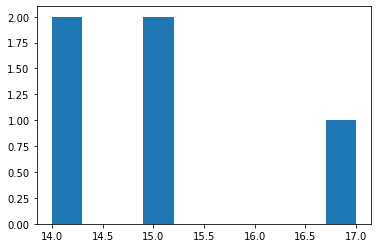

In [21]:
model = MoneyModel(5)

for i in range(1):
    model.step()
    
agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)